# Deep Learning Model for MNIST Data Set with KERAS
In diesem Notebook erstellen wir ein erstes Deep Learning Model für den MNIST Data Set.

## LOADING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## LOADING DATA

In [2]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 28, 28)
Shape x_test: (10000, 28, 28)


## Data Visualisation

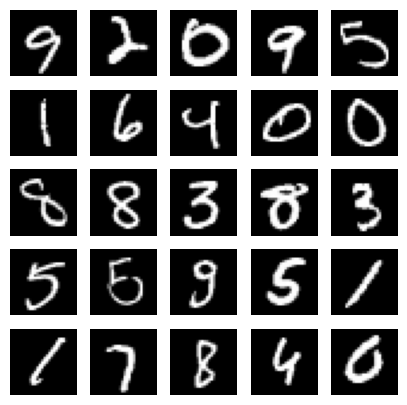

In [4]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Pre-Processing a data
### Reshaping the values

In [5]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

### Scaling the values

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
x_train[0:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Forming the output variables

In [8]:
# save each number as one-hot category
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Model
### Fixing the structure of the model

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-04-15 08:17:56.527501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training the model

In [15]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2639 - accuracy: 0.9253
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1071 - accuracy: 0.9691
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0496 - accuracy: 0.9857
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9891
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9919
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0207 - accuracy: 0.9943
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0118 - accuracy: 0.9969
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0103 - accuracy: 0.9974

### Evaluating the model performance


Accuracy during Training :
------------------------------------


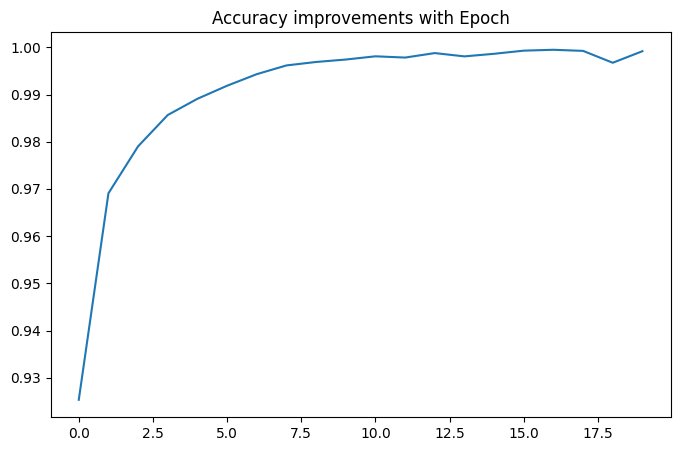

In [16]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


In [17]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9834


[0.07235985994338989, 0.9833999872207642]

## REFERENCES
Francois Chollet (2018), Deep Learning with Python, Manning.
Kumaran Ponnambalam (2022), Deep Learning: Model Optimization and Tuning, LinkedIn Learning.